In [1]:
import gym
import random
import numpy as np
import time
from IPython.display import clear_output

In [2]:
from routing_002.envs import Routing

init 1
source =  2
destination =  5
curr_state =  21


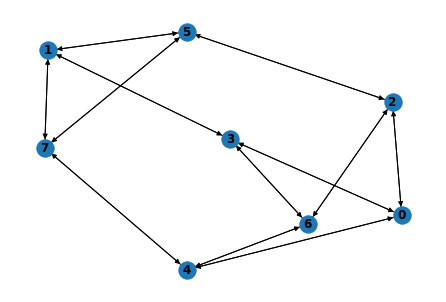

In [3]:
env = gym.make('routing-v1')

In [4]:
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

q_table = np.zeros((state_space_size,action_space_size))
#print(q_table)

In [5]:
num_episodes = 10000
max_steps_per_episode = 100

learning_rate = 0.1
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

In [6]:
rewards_all_episodes = []

#Q-Learning algorithm
for episode in range(num_episodes):
    state = env.reset()
    
    done = False
    rewards_current_episodes = 0
    
    for step in range(max_steps_per_episode):
        
        #exploration exploiatation trade-off
        exploration_rate_threshold = random.uniform(0,1)
        if exploration_rate_threshold > exploration_rate:
            #print("state for action : ", state)
            action = np.argmax(q_table[state,:])
            #print("max action = ", action)
        else:
            action = random.randrange(0,8)#choose any node from 0 to 7
           # print("random action", action )
        new_state, reward, done, info = env.step(action)
        
        # Update Q-Table for Q(s,a)
        
        q_table[state,action] = q_table[state,action] * (1 - learning_rate) + \
learning_rate * (reward + discount_rate*np.max(q_table[new_state,:]))
        
        state = new_state
        rewards_current_episodes += reward

        if done == True:
            break
            
        #exploration rate decay
        exploration_rate = min_exploration_rate + \
            (max_exploration_rate - min_exploration_rate) * \
            np.exp(-exploration_decay_rate*episode)
        
        rewards_all_episodes.append(rewards_current_episodes)
    
#print(np.array(rewards_all_episodes))
#calculate and print the avg reqard per thousand episodes
#rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000)
count = 1000

#print("********Average reward per thousand episodes********\n")
#for r in rewards_per_thousand_episodes:
 #   print(count, ": ", str(sum(r/1000)))
 #   count += 1000
    
#Print updated Q table 
#print("\n\n-------Q-table-------\n")
#print(q_table)


Source =  6
Destination =  4
--------------------------------
52 -100 False 1
52 -100 False 1
52 -100 False 1
52 -100 False 1
52 -100 False 1
52 -100 False 1
52 -100 False 1
52 -100 False 1
52 -100 False 1
52 -100 False 1
28 -1 False 1
28 -100 False 1
28 -100 False 1
28 -100 False 1
28 -100 False 1
52 -1 False 1
20 -1 False 1
20 -100 False 1
52 -1 False 1
52 -100 False 1
52 -100 False 1
52 -100 False 1
20 -1 False 1
20 -100 False 1
52 -1 False 1
20 -1 False 1
20 -100 False 1
4 -1 False 1
4 -100 False 1
28 -1 False 1
52 -1 False 1
20 -1 False 1
20 -100 False 1
4 -1 False 1
20 -1 False 1
44 -1 False 1
44 -100 False 1
60 -1 False 1
44 -1 False 1
44 -100 False 1
44 -100 False 1
44 -100 False 1
44 -100 False 1
20 -1 False 1
44 -1 False 1
44 -100 False 1
20 -1 False 1
52 -1 False 1
52 -100 False 1
28 -1 False 1
12 -1 False 1
60 -1 False 1
44 -1 False 1
44 -100 False 1
44 -100 False 1
20 -1 False 1
52 -1 False 1
52 -100 False 1
36 99 True 1
Source =  3
Destination =  4
-----------------------

17 -100 False 1
17 -100 False 1
17 -100 False 1
41 -1 False 1
9 99 True 1
Source =  4
Destination =  7
--------------------------------
39 -100 False 1
39 -100 False 1
7 -1 False 1
7 -100 False 1
7 -100 False 1
7 -100 False 1
31 -1 False 1
15 -1 False 1
31 -1 False 1
55 -1 False 1
31 -1 False 1
55 -1 False 1
55 -100 False 1
55 -100 False 1
55 -100 False 1
55 -100 False 1
55 -100 False 1
55 -100 False 1
55 -100 False 1
55 -100 False 1
23 -1 False 1
23 -100 False 1
55 -1 False 1
55 -100 False 1
55 -100 False 1
55 -100 False 1
55 -100 False 1
55 -100 False 1
55 -100 False 1
55 -100 False 1
55 -100 False 1
55 -100 False 1
55 -100 False 1
55 -100 False 1
39 -1 False 1
39 -100 False 1
39 -100 False 1
63 99 True 1
Source =  1
Destination =  7
--------------------------------
47 -1 False 1
47 -100 False 1
63 99 True 1
Source =  2
Destination =  4
--------------------------------
20 -100 False 1
20 -100 False 1
20 -100 False 1
20 -100 False 1
20 -100 False 1
20 -100 False 1
20 -100 False 1
44 -

58 -100 False 1
34 -1 False 1
50 -1 False 1
18 99 True 1
Source =  1
Destination =  5
--------------------------------
13 -100 False 1
61 -1 False 1
45 99 True 1
Source =  1
Destination =  0
--------------------------------
8 -100 False 1
56 -1 False 1
56 -100 False 1
56 -100 False 1
8 -1 False 1
8 -100 False 1
8 -100 False 1
40 -1 False 1
40 -100 False 1
8 -1 False 1
24 -1 False 1
0 99 True 1
Source =  2
Destination =  3
--------------------------------
19 -100 False 1
19 -100 False 1
19 -100 False 1
3 -1 False 1
19 -1 False 1
3 -1 False 1
35 -1 False 1
51 -1 False 1
51 -100 False 1
51 -100 False 1
27 99 True 1
Source =  2
Destination =  0
--------------------------------
16 -100 False 1
0 99 True 1
Source =  0
Destination =  3
--------------------------------
3 -100 False 1
3 -100 False 1
19 -1 False 1
19 -100 False 1
19 -100 False 1
51 -1 False 1
51 -100 False 1
51 -100 False 1
51 -100 False 1
51 -100 False 1
51 -100 False 1
27 99 True 1
Source =  1
Destination =  3
----------------

61 -100 False 1
61 -100 False 1
13 -1 False 1
13 -100 False 1
13 -100 False 1
13 -100 False 1
45 99 True 1
Source =  1
Destination =  7
--------------------------------
15 -100 False 1
63 99 True 1
Source =  6
Destination =  0
--------------------------------
32 -1 False 1
32 -100 False 1
32 -100 False 1
32 -100 False 1
0 99 True 1
Source =  7
Destination =  5
--------------------------------
61 -100 False 1
61 -100 False 1
61 -100 False 1
45 99 True 1
Source =  1
Destination =  7
--------------------------------
15 -100 False 1
15 -100 False 1
31 -1 False 1
31 -100 False 1
7 -1 False 1
7 -100 False 1
7 -100 False 1
7 -100 False 1
7 -100 False 1
7 -100 False 1
7 -100 False 1
23 -1 False 1
23 -100 False 1
47 -1 False 1
23 -1 False 1
47 -1 False 1
47 -100 False 1
63 99 True 1
Source =  6
Destination =  3
--------------------------------
51 -100 False 1
51 -100 False 1
51 -100 False 1
51 -100 False 1
51 -100 False 1
35 -1 False 1
3 -1 False 1
3 -100 False 1
19 -1 False 1
43 -1 False 1
59 

22 -100 False 1
22 -100 False 1
22 -100 False 1
22 -100 False 1
22 -100 False 1
22 -100 False 1
22 -100 False 1
22 -100 False 1
22 -100 False 1
54 99 True 1
Source =  6
Destination =  4
--------------------------------
52 -100 False 1
52 -100 False 1
52 -100 False 1
20 -1 False 1
20 -100 False 1
20 -100 False 1
4 -1 False 1
20 -1 False 1
20 -100 False 1
20 -100 False 1
20 -100 False 1
20 -100 False 1
20 -100 False 1
20 -100 False 1
4 -1 False 1
4 -100 False 1
4 -100 False 1
4 -100 False 1
4 -100 False 1
4 -100 False 1
4 -100 False 1
36 99 True 1
Source =  6
Destination =  1
--------------------------------
17 -1 False 1
41 -1 False 1
41 -100 False 1
9 99 True 1
Source =  5
Destination =  0
--------------------------------
40 -100 False 1
16 -1 False 1
0 99 True 1
Source =  1
Destination =  2
--------------------------------
10 -100 False 1
10 -100 False 1
10 -100 False 1
10 -100 False 1
58 -1 False 1
58 -100 False 1
42 -1 False 1
42 -100 False 1
42 -100 False 1
58 -1 False 1
42 -1 Fals

21 -100 False 1
21 -100 False 1
45 99 True 1
Source =  0
Destination =  5
--------------------------------
21 -1 False 1
21 -100 False 1
45 99 True 1
Source =  6
Destination =  3
--------------------------------
51 -100 False 1
51 -100 False 1
51 -100 False 1
51 -100 False 1
51 -100 False 1
27 99 True 1
Source =  1
Destination =  2
--------------------------------
10 -100 False 1
42 -1 False 1
18 99 True 1
Source =  1
Destination =  6
--------------------------------
14 -100 False 1
14 -100 False 1
14 -100 False 1
62 -1 False 1
62 -100 False 1
62 -100 False 1
62 -100 False 1
46 -1 False 1
22 -1 False 1
54 99 True 1
Source =  7
Destination =  4
--------------------------------
36 99 True 1
Source =  6
Destination =  4
--------------------------------
36 99 True 1
Source =  4
Destination =  3
--------------------------------
59 -1 False 1
59 -100 False 1
59 -100 False 1
59 -100 False 1
11 -1 False 1
59 -1 False 1
43 -1 False 1
43 -100 False 1
19 -1 False 1
3 -1 False 1
3 -100 False 1
3 -

14 -100 False 1
14 -100 False 1
14 -100 False 1
14 -100 False 1
46 -1 False 1
14 -1 False 1
14 -100 False 1
46 -1 False 1
46 -100 False 1
46 -100 False 1
14 -1 False 1
14 -100 False 1
14 -100 False 1
14 -100 False 1
14 -100 False 1
14 -100 False 1
46 -1 False 1
22 -1 False 1
46 -1 False 1
46 -100 False 1
46 -100 False 1
46 -100 False 1
22 -1 False 1
22 -100 False 1
54 99 True 1
Source =  5
Destination =  7
--------------------------------
47 -100 False 1
47 -100 False 1
63 99 True 1
Source =  5
Destination =  2
--------------------------------
10 -1 False 1
10 -100 False 1
58 -1 False 1
58 -100 False 1
58 -100 False 1
58 -100 False 1
58 -100 False 1
58 -100 False 1
42 -1 False 1
18 99 True 1
Source =  0
Destination =  6
--------------------------------
6 -100 False 1
22 -1 False 1
22 -100 False 1
22 -100 False 1
46 -1 False 1
46 -100 False 1
22 -1 False 1
6 -1 False 1
6 -100 False 1
38 -1 False 1
54 99 True 1
Source =  1
Destination =  5
--------------------------------
45 99 True 1
So

7 -100 False 1
39 -1 False 1
39 -100 False 1
39 -100 False 1
39 -100 False 1
63 99 True 1
Source =  4
Destination =  7
--------------------------------
63 99 True 1
Source =  4
Destination =  2
--------------------------------
34 -100 False 1
50 -1 False 1
18 99 True 1
Source =  2
Destination =  6
--------------------------------
54 99 True 1
Source =  7
Destination =  1
--------------------------------
57 -100 False 1
41 -1 False 1
9 99 True 1
Source =  6
Destination =  5
--------------------------------
53 -100 False 1
53 -100 False 1
21 -1 False 1
21 -100 False 1
21 -100 False 1
21 -100 False 1
21 -100 False 1
21 -100 False 1
45 99 True 1
Source =  0
Destination =  7
--------------------------------
39 -1 False 1
63 99 True 1
Source =  7
Destination =  3
--------------------------------
59 -100 False 1
59 -100 False 1
11 -1 False 1
11 -100 False 1
27 99 True 1
Source =  0
Destination =  7
--------------------------------
23 -1 False 1
23 -100 False 1
55 -1 False 1
39 -1 False 1
39 -

--------------------------------
26 -100 False 1
26 -100 False 1
26 -100 False 1
26 -100 False 1
10 -1 False 1
10 -100 False 1
42 -1 False 1
42 -100 False 1
42 -100 False 1
42 -100 False 1
42 -100 False 1
42 -100 False 1
42 -100 False 1
18 99 True 1
Source =  0
Destination =  1
--------------------------------
17 -1 False 1
17 -100 False 1
41 -1 False 1
41 -100 False 1
41 -100 False 1
41 -100 False 1
9 99 True 1
Source =  3
Destination =  4
--------------------------------
52 -1 False 1
28 -1 False 1
28 -100 False 1
28 -100 False 1
4 -1 False 1
4 -100 False 1
36 99 True 1
Source =  0
Destination =  6
--------------------------------
38 -1 False 1
54 99 True 1
Source =  6
Destination =  3
--------------------------------
27 99 True 1
Source =  7
Destination =  6
--------------------------------
46 -1 False 1
14 -1 False 1
14 -100 False 1
46 -1 False 1
46 -100 False 1
22 -1 False 1
54 99 True 1
Source =  3
Destination =  6
--------------------------------
30 -100 False 1
30 -100 False 1


48 -1 False 1
48 -100 False 1
48 -100 False 1
48 -100 False 1
16 -1 False 1
16 -100 False 1
48 -1 False 1
24 -1 False 1
24 -100 False 1
0 99 True 1
Source =  7
Destination =  2
--------------------------------
58 -100 False 1
58 -100 False 1
42 -1 False 1
42 -100 False 1
42 -100 False 1
18 99 True 1
Source =  2
Destination =  7
--------------------------------
23 -100 False 1
23 -100 False 1
47 -1 False 1
47 -100 False 1
23 -1 False 1
55 -1 False 1
55 -100 False 1
55 -100 False 1
55 -100 False 1
55 -100 False 1
39 -1 False 1
63 99 True 1
Source =  5
Destination =  1
--------------------------------
17 -1 False 1
41 -1 False 1
9 99 True 1
Source =  1
Destination =  0
--------------------------------
40 -1 False 1
8 -1 False 1
24 -1 False 1
24 -100 False 1
0 99 True 1
Source =  6
Destination =  4
--------------------------------
36 99 True 1
Source =  1
Destination =  6
--------------------------------
62 -1 False 1
38 -1 False 1
38 -100 False 1
6 -1 False 1
6 -100 False 1
30 -1 False 1


0 99 True 1
Source =  2
Destination =  1
--------------------------------
41 -1 False 1
9 99 True 1
Source =  4
Destination =  6
--------------------------------
38 -100 False 1
54 99 True 1
Source =  7
Destination =  2
--------------------------------
42 -1 False 1
42 -100 False 1
42 -100 False 1
42 -100 False 1
42 -100 False 1
18 99 True 1
Source =  6
Destination =  3
--------------------------------
51 -100 False 1
27 99 True 1
Source =  5
Destination =  2
--------------------------------
18 99 True 1
Source =  7
Destination =  3
--------------------------------
11 -1 False 1
27 99 True 1
Source =  2
Destination =  7
--------------------------------
7 -1 False 1
39 -1 False 1
63 99 True 1
Source =  5
Destination =  0
--------------------------------
56 -1 False 1
40 -1 False 1
40 -100 False 1
16 -1 False 1
40 -1 False 1
40 -100 False 1
16 -1 False 1
16 -100 False 1
0 99 True 1
Source =  2
Destination =  1
--------------------------------
41 -1 False 1
57 -1 False 1
57 -100 False 1
4

Source =  5
Destination =  0
--------------------------------
40 -100 False 1
16 -1 False 1
16 -100 False 1
16 -100 False 1
0 99 True 1
Source =  1
Destination =  5
--------------------------------
45 99 True 1
Source =  3
Destination =  0
--------------------------------
0 99 True 1
Source =  7
Destination =  3
--------------------------------
59 -100 False 1
59 -100 False 1
43 -1 False 1
11 -1 False 1
27 99 True 1
Source =  7
Destination =  1
--------------------------------
9 99 True 1
Source =  4
Destination =  1
--------------------------------
57 -1 False 1
9 99 True 1
Source =  2
Destination =  0
--------------------------------
0 99 True 1
Source =  7
Destination =  0
--------------------------------
56 -100 False 1
56 -100 False 1
32 -1 False 1
0 99 True 1
Source =  1
Destination =  4
--------------------------------
60 -1 False 1
36 99 True 1
Source =  7
Destination =  2
--------------------------------
58 -100 False 1
42 -1 False 1
18 99 True 1
Source =  5
Destination =  7
-

39 -1 False 1
7 -1 False 1
39 -1 False 1
39 -100 False 1
39 -100 False 1
63 99 True 1
Source =  1
Destination =  3
--------------------------------
27 99 True 1
Source =  4
Destination =  6
--------------------------------
38 -100 False 1
38 -100 False 1
6 -1 False 1
38 -1 False 1
54 99 True 1
Source =  5
Destination =  0
--------------------------------
16 -1 False 1
16 -100 False 1
0 99 True 1
Source =  7
Destination =  1
--------------------------------
9 99 True 1
Source =  2
Destination =  3
--------------------------------
19 -100 False 1
3 -1 False 1
3 -100 False 1
27 99 True 1
Source =  1
Destination =  2
--------------------------------
42 -1 False 1
18 99 True 1
Source =  7
Destination =  4
--------------------------------
36 99 True 1
Source =  0
Destination =  3
--------------------------------
27 99 True 1
Source =  1
Destination =  4
--------------------------------
12 -100 False 1
12 -100 False 1
60 -1 False 1
44 -1 False 1
60 -1 False 1
12 -1 False 1
60 -1 False 1
60 -1

Source =  7
Destination =  6
--------------------------------
38 -1 False 1
54 99 True 1
Source =  5
Destination =  1
--------------------------------
41 -100 False 1
9 99 True 1
Source =  4
Destination =  7
--------------------------------
39 -100 False 1
63 99 True 1
Source =  5
Destination =  4
--------------------------------
12 -1 False 1
12 -100 False 1
60 -1 False 1
60 -100 False 1
36 99 True 1
Source =  4
Destination =  6
--------------------------------
54 99 True 1
Source =  4
Destination =  6
--------------------------------
38 -100 False 1
54 99 True 1
Source =  1
Destination =  4
--------------------------------
44 -1 False 1
60 -1 False 1
36 99 True 1
Source =  0
Destination =  2
--------------------------------
18 99 True 1
Source =  5
Destination =  4
--------------------------------
60 -1 False 1
36 99 True 1
Source =  2
Destination =  3
--------------------------------
19 -100 False 1
19 -100 False 1
3 -1 False 1
19 -1 False 1
3 -1 False 1
35 -1 False 1
3 -1 False 1
2

Source =  2
Destination =  1
--------------------------------
1 -1 False 1
17 -1 False 1
41 -1 False 1
9 99 True 1
Source =  4
Destination =  0
--------------------------------
0 99 True 1
Source =  3
Destination =  6
--------------------------------
54 99 True 1
Source =  3
Destination =  4
--------------------------------
28 -100 False 1
4 -1 False 1
36 99 True 1
Source =  1
Destination =  3
--------------------------------
27 99 True 1
Source =  3
Destination =  4
--------------------------------
4 -1 False 1
36 99 True 1
Source =  5
Destination =  6
--------------------------------
22 -1 False 1
22 -100 False 1
54 99 True 1
Source =  5
Destination =  1
--------------------------------
9 99 True 1
Source =  2
Destination =  0
--------------------------------
0 99 True 1
Source =  6
Destination =  2
--------------------------------
18 99 True 1
Source =  0
Destination =  2
--------------------------------
34 -1 False 1
50 -1 False 1
18 99 True 1
Source =  7
Destination =  1
---------

24 -1 False 1
0 99 True 1
Source =  3
Destination =  6
--------------------------------
54 99 True 1
Source =  7
Destination =  5
--------------------------------
45 99 True 1
Source =  6
Destination =  0
--------------------------------
32 -1 False 1
0 99 True 1
Source =  4
Destination =  6
--------------------------------
54 99 True 1
Source =  2
Destination =  5
--------------------------------
45 99 True 1
Source =  4
Destination =  2
--------------------------------
34 -100 False 1
50 -1 False 1
50 -100 False 1
18 99 True 1
Source =  7
Destination =  3
--------------------------------
11 -1 False 1
27 99 True 1
Source =  7
Destination =  6
--------------------------------
38 -1 False 1
54 99 True 1
Source =  2
Destination =  6
--------------------------------
54 99 True 1
Source =  7
Destination =  0
--------------------------------
8 -1 False 1
8 -100 False 1
24 -1 False 1
0 99 True 1
Source =  1
Destination =  6
--------------------------------
46 -1 False 1
46 -100 False 1
14 -

39 -1 False 1
63 99 True 1
Source =  1
Destination =  6
--------------------------------
14 -100 False 1
30 -1 False 1
54 99 True 1
Source =  3
Destination =  5
--------------------------------
5 -1 False 1
21 -1 False 1
45 99 True 1
Source =  4
Destination =  5
--------------------------------
61 -1 False 1
45 99 True 1
Source =  0
Destination =  3
--------------------------------
27 99 True 1
Source =  3
Destination =  2
--------------------------------
50 -1 False 1
26 -1 False 1
26 -100 False 1
50 -1 False 1
50 -100 False 1
50 -100 False 1
18 99 True 1
Source =  6
Destination =  7
--------------------------------
39 -1 False 1
39 -100 False 1
63 99 True 1
Source =  6
Destination =  1
--------------------------------
17 -1 False 1
41 -1 False 1
9 99 True 1
Source =  2
Destination =  7
--------------------------------
47 -1 False 1
63 99 True 1
Source =  4
Destination =  5
--------------------------------
5 -1 False 1
21 -1 False 1
53 -1 False 1
21 -1 False 1
45 99 True 1
Source =  5

46 -1 False 1
22 -1 False 1
54 99 True 1
Source =  3
Destination =  0
--------------------------------
24 -100 False 1
0 99 True 1
Source =  2
Destination =  4
--------------------------------
4 -1 False 1
4 -100 False 1
36 99 True 1
Source =  1
Destination =  4
--------------------------------
12 -100 False 1
60 -1 False 1
36 99 True 1
Source =  4
Destination =  3
--------------------------------
3 -1 False 1
27 99 True 1
Source =  7
Destination =  2
--------------------------------
42 -1 False 1
18 99 True 1
Source =  5
Destination =  7
--------------------------------
23 -1 False 1
47 -1 False 1
63 99 True 1
Source =  1
Destination =  6
--------------------------------
14 -100 False 1
62 -1 False 1
38 -1 False 1
54 99 True 1
Source =  5
Destination =  4
--------------------------------
60 -1 False 1
60 -100 False 1
36 99 True 1
Source =  2
Destination =  1
--------------------------------
41 -1 False 1
41 -100 False 1
9 99 True 1
Source =  2
Destination =  7
------------------------

63 99 True 1
Source =  7
Destination =  4
--------------------------------
36 99 True 1
Source =  2
Destination =  3
--------------------------------
3 -1 False 1
27 99 True 1
Source =  2
Destination =  3
--------------------------------
3 -1 False 1
27 99 True 1
Source =  2
Destination =  6
--------------------------------
54 99 True 1
Source =  1
Destination =  6
--------------------------------
46 -1 False 1
22 -1 False 1
54 99 True 1
Source =  1
Destination =  4
--------------------------------
60 -1 False 1
36 99 True 1
Source =  2
Destination =  6
--------------------------------
54 99 True 1
Source =  0
Destination =  6
--------------------------------
38 -1 False 1
38 -100 False 1
6 -1 False 1
38 -1 False 1
38 -100 False 1
54 99 True 1
Source =  6
Destination =  0
--------------------------------
16 -1 False 1
0 99 True 1
Source =  0
Destination =  2
--------------------------------
34 -1 False 1
34 -100 False 1
58 -1 False 1
42 -1 False 1
42 -100 False 1
18 99 True 1
Source = 

36 99 True 1
Source =  5
Destination =  7
--------------------------------
63 99 True 1
Source =  6
Destination =  5
--------------------------------
53 -100 False 1
21 -1 False 1
45 99 True 1
Source =  7
Destination =  3
--------------------------------
11 -1 False 1
11 -100 False 1
27 99 True 1
Source =  5
Destination =  1
--------------------------------
41 -100 False 1
9 99 True 1
Source =  6
Destination =  2
--------------------------------
18 99 True 1
Source =  4
Destination =  7
--------------------------------
63 99 True 1
Source =  6
Destination =  3
--------------------------------
27 99 True 1
Source =  7
Destination =  5
--------------------------------
61 -100 False 1
61 -100 False 1
45 99 True 1
Source =  3
Destination =  4
--------------------------------
4 -1 False 1
36 99 True 1
Source =  6
Destination =  3
--------------------------------
51 -100 False 1
27 99 True 1
Source =  6
Destination =  7
--------------------------------
39 -1 False 1
39 -100 False 1
63 99 Tru

54 99 True 1
Source =  3
Destination =  2
--------------------------------
50 -1 False 1
18 99 True 1
Source =  4
Destination =  2
--------------------------------
50 -1 False 1
18 99 True 1
Source =  3
Destination =  1
--------------------------------
9 99 True 1
Source =  4
Destination =  0
--------------------------------
0 99 True 1
Source =  5
Destination =  3
--------------------------------
11 -1 False 1
11 -100 False 1
27 99 True 1
Source =  1
Destination =  2
--------------------------------
42 -1 False 1
18 99 True 1
Source =  5
Destination =  7
--------------------------------
63 99 True 1
Source =  6
Destination =  4
--------------------------------
52 -100 False 1
52 -100 False 1
20 -1 False 1
4 -1 False 1
36 99 True 1
Source =  5
Destination =  4
--------------------------------
60 -1 False 1
36 99 True 1
Source =  1
Destination =  2
--------------------------------
42 -1 False 1
18 99 True 1
Source =  7
Destination =  4
--------------------------------
36 99 True 1
Sourc

Source =  1
Destination =  4
--------------------------------
60 -1 False 1
60 -100 False 1
36 99 True 1
Source =  5
Destination =  3
--------------------------------
11 -1 False 1
43 -1 False 1
11 -1 False 1
27 99 True 1
Source =  0
Destination =  2
--------------------------------
18 99 True 1
Source =  7
Destination =  3
--------------------------------
11 -1 False 1
27 99 True 1
Source =  6
Destination =  5
--------------------------------
21 -1 False 1
45 99 True 1
Source =  3
Destination =  6
--------------------------------
54 99 True 1
Source =  2
Destination =  7
--------------------------------
47 -1 False 1
63 99 True 1
Source =  4
Destination =  2
--------------------------------
50 -1 False 1
18 99 True 1
Source =  7
Destination =  6
--------------------------------
38 -1 False 1
54 99 True 1
Source =  3
Destination =  0
--------------------------------
48 -1 False 1
16 -1 False 1
0 99 True 1
Source =  3
Destination =  2
--------------------------------
26 -100 False 1
50 

Source =  1
Destination =  4
--------------------------------
60 -1 False 1
36 99 True 1
Source =  0
Destination =  6
--------------------------------
22 -1 False 1
54 99 True 1
Source =  6
Destination =  0
--------------------------------
48 -100 False 1
16 -1 False 1
0 99 True 1
Source =  0
Destination =  1
--------------------------------
17 -1 False 1
41 -1 False 1
9 99 True 1
Source =  1
Destination =  0
--------------------------------
24 -1 False 1
0 99 True 1
Source =  7
Destination =  1
--------------------------------
57 -100 False 1
9 99 True 1
Source =  1
Destination =  5
--------------------------------
45 99 True 1
Source =  6
Destination =  1
--------------------------------
17 -1 False 1
41 -1 False 1
9 99 True 1
Source =  0
Destination =  7
--------------------------------
39 -1 False 1
63 99 True 1
Source =  0
Destination =  4
--------------------------------
36 99 True 1
Source =  5
Destination =  7
--------------------------------
63 99 True 1
Source =  4
Destinatio

54 99 True 1
Source =  1
Destination =  0
--------------------------------
24 -1 False 1
0 99 True 1
Source =  7
Destination =  4
--------------------------------
36 99 True 1
Source =  0
Destination =  6
--------------------------------
38 -1 False 1
54 99 True 1
Source =  1
Destination =  2
--------------------------------
42 -1 False 1
18 99 True 1
Source =  7
Destination =  1
--------------------------------
9 99 True 1
Source =  2
Destination =  5
--------------------------------
53 -1 False 1
21 -1 False 1
45 99 True 1
Source =  7
Destination =  0
--------------------------------
56 -100 False 1
8 -1 False 1
24 -1 False 1
0 99 True 1
Source =  6
Destination =  5
--------------------------------
21 -1 False 1
45 99 True 1
Source =  4
Destination =  5
--------------------------------
61 -1 False 1
45 99 True 1
Source =  2
Destination =  6
--------------------------------
54 99 True 1
Source =  4
Destination =  1
--------------------------------
57 -1 False 1
9 99 True 1
Source =  7

Source =  2
Destination =  1
--------------------------------
41 -1 False 1
17 -1 False 1
49 -1 False 1
17 -1 False 1
41 -1 False 1
9 99 True 1
Source =  0
Destination =  4
--------------------------------
36 99 True 1
Source =  1
Destination =  7
--------------------------------
63 99 True 1
Source =  3
Destination =  6
--------------------------------
54 99 True 1
Source =  5
Destination =  6
--------------------------------
22 -1 False 1
54 99 True 1
Source =  5
Destination =  2
--------------------------------
18 99 True 1
Source =  4
Destination =  1
--------------------------------
57 -1 False 1
9 99 True 1
Source =  6
Destination =  5
--------------------------------
21 -1 False 1
45 99 True 1
Source =  7
Destination =  6
--------------------------------
38 -1 False 1
54 99 True 1
Source =  1
Destination =  6
--------------------------------
46 -1 False 1
22 -1 False 1
54 99 True 1
Source =  1
Destination =  3
--------------------------------
11 -100 False 1
27 99 True 1
Source 

27 99 True 1
Source =  1
Destination =  5
--------------------------------
45 99 True 1
Source =  0
Destination =  6
--------------------------------
38 -1 False 1
54 99 True 1
Source =  4
Destination =  1
--------------------------------
57 -1 False 1
9 99 True 1
Source =  5
Destination =  2
--------------------------------
18 99 True 1
Source =  1
Destination =  3
--------------------------------
27 99 True 1
Source =  7
Destination =  0
--------------------------------
8 -1 False 1
24 -1 False 1
0 99 True 1
Source =  4
Destination =  3
--------------------------------
35 -100 False 1
35 -100 False 1
3 -1 False 1
27 99 True 1
Source =  3
Destination =  6
--------------------------------
54 99 True 1
Source =  7
Destination =  6
--------------------------------
38 -1 False 1
54 99 True 1
Source =  4
Destination =  6
--------------------------------
54 99 True 1
Source =  4
Destination =  5
--------------------------------
61 -1 False 1
45 99 True 1
Source =  3
Destination =  5
-------

11 -1 False 1
27 99 True 1
Source =  0
Destination =  6
--------------------------------
38 -1 False 1
54 99 True 1
Source =  2
Destination =  3
--------------------------------
3 -1 False 1
27 99 True 1
Source =  7
Destination =  4
--------------------------------
36 99 True 1
Source =  2
Destination =  0
--------------------------------
0 99 True 1
Source =  3
Destination =  5
--------------------------------
13 -1 False 1
45 99 True 1
Source =  2
Destination =  0
--------------------------------
0 99 True 1
Source =  0
Destination =  3
--------------------------------
3 -100 False 1
27 99 True 1
Source =  1
Destination =  4
--------------------------------
60 -1 False 1
36 99 True 1
Source =  3
Destination =  0
--------------------------------
0 99 True 1
Source =  7
Destination =  1
--------------------------------
9 99 True 1
Source =  1
Destination =  3
--------------------------------
27 99 True 1
Source =  2
Destination =  5
--------------------------------
45 99 True 1
Source 

63 99 True 1
Source =  7
Destination =  2
--------------------------------
42 -1 False 1
18 99 True 1
Source =  1
Destination =  3
--------------------------------
27 99 True 1
Source =  4
Destination =  3
--------------------------------
3 -1 False 1
27 99 True 1
Source =  4
Destination =  5
--------------------------------
61 -1 False 1
45 99 True 1
Source =  2
Destination =  4
--------------------------------
20 -100 False 1
4 -1 False 1
36 99 True 1
Source =  1
Destination =  6
--------------------------------
46 -1 False 1
22 -1 False 1
54 99 True 1
Source =  4
Destination =  5
--------------------------------
61 -1 False 1
45 99 True 1
Source =  1
Destination =  2
--------------------------------
42 -1 False 1
18 99 True 1
Source =  6
Destination =  1
--------------------------------
17 -1 False 1
41 -1 False 1
9 99 True 1
Source =  4
Destination =  0
--------------------------------
0 99 True 1
Source =  1
Destination =  5
--------------------------------
45 99 True 1
Source =  

Source =  5
Destination =  0
--------------------------------
16 -1 False 1
40 -1 False 1
16 -1 False 1
0 99 True 1
Source =  0
Destination =  5
--------------------------------
21 -1 False 1
45 99 True 1
Source =  3
Destination =  2
--------------------------------
50 -1 False 1
18 99 True 1
Source =  0
Destination =  7
--------------------------------
39 -1 False 1
63 99 True 1
Source =  4
Destination =  2
--------------------------------
50 -1 False 1
18 99 True 1
Source =  4
Destination =  7
--------------------------------
63 99 True 1
Source =  5
Destination =  2
--------------------------------
18 99 True 1
Source =  4
Destination =  3
--------------------------------
3 -1 False 1
27 99 True 1
Source =  3
Destination =  4
--------------------------------
4 -1 False 1
36 99 True 1
Source =  4
Destination =  7
--------------------------------
63 99 True 1
Source =  4
Destination =  5
--------------------------------
61 -1 False 1
45 99 True 1
Source =  0
Destination =  4
---------

Destination =  6
--------------------------------
22 -1 False 1
54 99 True 1
Source =  4
Destination =  3
--------------------------------
3 -1 False 1
27 99 True 1
Source =  5
Destination =  1
--------------------------------
9 99 True 1
Source =  6
Destination =  0
--------------------------------
16 -1 False 1
0 99 True 1
Source =  7
Destination =  1
--------------------------------
9 99 True 1
Source =  1
Destination =  2
--------------------------------
42 -1 False 1
18 99 True 1
Source =  7
Destination =  0
--------------------------------
8 -1 False 1
24 -1 False 1
0 99 True 1
Source =  7
Destination =  3
--------------------------------
59 -100 False 1
11 -1 False 1
27 99 True 1
Source =  7
Destination =  4
--------------------------------
36 99 True 1
Source =  4
Destination =  3
--------------------------------
3 -1 False 1
27 99 True 1
Source =  0
Destination =  7
--------------------------------
39 -1 False 1
63 99 True 1
Source =  7
Destination =  0
-----------------------

Source =  6
Destination =  2
--------------------------------
18 99 True 1
Source =  6
Destination =  3
--------------------------------
27 99 True 1
Source =  0
Destination =  5
--------------------------------
5 -100 False 1
21 -1 False 1
45 99 True 1
Source =  4
Destination =  3
--------------------------------
3 -1 False 1
27 99 True 1
Source =  3
Destination =  0
--------------------------------
0 99 True 1
Source =  1
Destination =  4
--------------------------------
60 -1 False 1
36 99 True 1
Source =  2
Destination =  1
--------------------------------
41 -1 False 1
9 99 True 1
Source =  5
Destination =  4
--------------------------------
60 -1 False 1
36 99 True 1
Source =  2
Destination =  6
--------------------------------
54 99 True 1
Source =  2
Destination =  7
--------------------------------
47 -1 False 1
63 99 True 1
Source =  0
Destination =  4
--------------------------------
36 99 True 1
Source =  4
Destination =  7
--------------------------------
63 99 True 1
Sour

18 99 True 1
Source =  5
Destination =  4
--------------------------------
60 -1 False 1
36 99 True 1
Source =  4
Destination =  6
--------------------------------
54 99 True 1
Source =  1
Destination =  5
--------------------------------
45 99 True 1
Source =  1
Destination =  6
--------------------------------
46 -1 False 1
22 -1 False 1
54 99 True 1
Source =  4
Destination =  5
--------------------------------
61 -1 False 1
45 99 True 1
Source =  4
Destination =  1
--------------------------------
57 -1 False 1
9 99 True 1
Source =  0
Destination =  5
--------------------------------
21 -1 False 1
45 99 True 1
Source =  0
Destination =  2
--------------------------------
18 99 True 1
Source =  2
Destination =  4
--------------------------------
4 -1 False 1
36 99 True 1
Source =  6
Destination =  7
--------------------------------
39 -1 False 1
63 99 True 1
Source =  5
Destination =  3
--------------------------------
11 -1 False 1
27 99 True 1
Source =  5
Destination =  6
---------

54 99 True 1
Source =  3
Destination =  1
--------------------------------
9 99 True 1
Source =  6
Destination =  7
--------------------------------
39 -1 False 1
63 99 True 1
Source =  5
Destination =  3
--------------------------------
11 -1 False 1
27 99 True 1
Source =  2
Destination =  5
--------------------------------
45 99 True 1
Source =  7
Destination =  5
--------------------------------
45 99 True 1
Source =  6
Destination =  7
--------------------------------
39 -1 False 1
63 99 True 1
Source =  0
Destination =  2
--------------------------------
18 99 True 1
Source =  0
Destination =  2
--------------------------------
18 99 True 1
Source =  5
Destination =  1
--------------------------------
9 99 True 1
Source =  0
Destination =  3
--------------------------------
27 99 True 1
Source =  2
Destination =  1
--------------------------------
41 -1 False 1
9 99 True 1
Source =  6
Destination =  2
--------------------------------
18 99 True 1
Source =  7
Destination =  2
-----

38 -1 False 1
54 99 True 1
Source =  1
Destination =  7
--------------------------------
63 99 True 1
Source =  5
Destination =  4
--------------------------------
60 -1 False 1
36 99 True 1
Source =  0
Destination =  7
--------------------------------
39 -1 False 1
63 99 True 1
Source =  4
Destination =  0
--------------------------------
0 99 True 1
Source =  0
Destination =  3
--------------------------------
27 99 True 1
Source =  6
Destination =  1
--------------------------------
17 -1 False 1
41 -1 False 1
9 99 True 1
Source =  4
Destination =  3
--------------------------------
3 -1 False 1
27 99 True 1
Source =  0
Destination =  2
--------------------------------
18 99 True 1
Source =  7
Destination =  0
--------------------------------
8 -1 False 1
24 -1 False 1
0 99 True 1
Source =  6
Destination =  4
--------------------------------
36 99 True 1
Source =  6
Destination =  2
--------------------------------
18 99 True 1
Source =  6
Destination =  2
--------------------------

38 -1 False 1
54 99 True 1
Source =  6
Destination =  1
--------------------------------
17 -1 False 1
41 -1 False 1
9 99 True 1
Source =  1
Destination =  0
--------------------------------
24 -1 False 1
0 99 True 1
Source =  4
Destination =  2
--------------------------------
50 -1 False 1
18 99 True 1
Source =  3
Destination =  2
--------------------------------
50 -1 False 1
18 99 True 1
Source =  5
Destination =  7
--------------------------------
63 99 True 1
Source =  2
Destination =  4
--------------------------------
4 -1 False 1
36 99 True 1
Source =  2
Destination =  0
--------------------------------
0 99 True 1
Source =  3
Destination =  5
--------------------------------
13 -1 False 1
45 99 True 1
Source =  7
Destination =  6
--------------------------------
38 -1 False 1
54 99 True 1
Source =  1
Destination =  2
--------------------------------
42 -1 False 1
18 99 True 1
Source =  4
Destination =  2
--------------------------------
50 -1 False 1
18 99 True 1
Source =  6


Source =  7
Destination =  5
--------------------------------
45 99 True 1
Source =  0
Destination =  6
--------------------------------
38 -1 False 1
54 99 True 1
Source =  1
Destination =  5
--------------------------------
45 99 True 1
Source =  5
Destination =  7
--------------------------------
63 99 True 1
Source =  6
Destination =  1
--------------------------------
17 -1 False 1
41 -1 False 1
9 99 True 1
Source =  7
Destination =  3
--------------------------------
11 -1 False 1
27 99 True 1
Source =  5
Destination =  3
--------------------------------
11 -1 False 1
27 99 True 1
Source =  6
Destination =  5
--------------------------------
21 -1 False 1
45 99 True 1
Source =  0
Destination =  3
--------------------------------
27 99 True 1
Source =  0
Destination =  1
--------------------------------
17 -1 False 1
41 -1 False 1
9 99 True 1
Source =  6
Destination =  7
--------------------------------
39 -1 False 1
63 99 True 1
Source =  3
Destination =  7
----------------------

--------------------------------
63 99 True 1
Source =  3
Destination =  5
--------------------------------
13 -1 False 1
45 99 True 1
Source =  3
Destination =  0
--------------------------------
0 99 True 1
Source =  7
Destination =  0
--------------------------------
8 -1 False 1
24 -1 False 1
0 99 True 1
Source =  3
Destination =  2
--------------------------------
50 -1 False 1
18 99 True 1
Source =  1
Destination =  2
--------------------------------
42 -1 False 1
42 -100 False 1
18 99 True 1
Source =  3
Destination =  6
--------------------------------
54 99 True 1
Source =  2
Destination =  3
--------------------------------
3 -1 False 1
27 99 True 1
Source =  0
Destination =  3
--------------------------------
27 99 True 1
Source =  7
Destination =  0
--------------------------------
8 -1 False 1
24 -1 False 1
0 99 True 1
Source =  0
Destination =  1
--------------------------------
17 -1 False 1
41 -1 False 1
9 99 True 1
Source =  1
Destination =  7
--------------------------

Source =  0
Destination =  1
--------------------------------
17 -1 False 1
41 -1 False 1
9 99 True 1
Source =  2
Destination =  1
--------------------------------
41 -1 False 1
9 99 True 1
Source =  7
Destination =  2
--------------------------------
42 -1 False 1
18 99 True 1
Source =  1
Destination =  7
--------------------------------
63 99 True 1
Source =  5
Destination =  0
--------------------------------
16 -1 False 1
16 -100 False 1
0 99 True 1
Source =  4
Destination =  3
--------------------------------
3 -1 False 1
27 99 True 1
Source =  2
Destination =  6
--------------------------------
54 99 True 1
Source =  3
Destination =  2
--------------------------------
50 -1 False 1
18 99 True 1
Source =  5
Destination =  4
--------------------------------
60 -1 False 1
36 99 True 1
Source =  7
Destination =  4
--------------------------------
36 99 True 1
Source =  4
Destination =  2
--------------------------------
50 -1 False 1
18 99 True 1
Source =  5
Destination =  3
--------

22 -1 False 1
54 99 True 1
Source =  4
Destination =  5
--------------------------------
61 -1 False 1
45 99 True 1
Source =  5
Destination =  4
--------------------------------
60 -1 False 1
36 99 True 1
Source =  2
Destination =  7
--------------------------------
47 -1 False 1
63 99 True 1
Source =  1
Destination =  0
--------------------------------
24 -1 False 1
0 99 True 1
Source =  1
Destination =  0
--------------------------------
24 -1 False 1
0 99 True 1
Source =  2
Destination =  4
--------------------------------
4 -1 False 1
36 99 True 1
Source =  1
Destination =  2
--------------------------------
42 -1 False 1
18 99 True 1
Source =  6
Destination =  2
--------------------------------
18 99 True 1
Source =  2
Destination =  4
--------------------------------
4 -1 False 1
36 99 True 1
Source =  4
Destination =  7
--------------------------------
63 99 True 1
Source =  6
Destination =  2
--------------------------------
18 99 True 1
Source =  7
Destination =  1
-----------

0 99 True 1
Source =  6
Destination =  2
--------------------------------
18 99 True 1
Source =  0
Destination =  1
--------------------------------
17 -1 False 1
41 -1 False 1
9 99 True 1
Source =  7
Destination =  3
--------------------------------
11 -1 False 1
27 99 True 1
Source =  5
Destination =  3
--------------------------------
11 -1 False 1
27 99 True 1
Source =  1
Destination =  0
--------------------------------
24 -1 False 1
0 99 True 1
Source =  0
Destination =  2
--------------------------------
18 99 True 1
Source =  6
Destination =  7
--------------------------------
39 -1 False 1
63 99 True 1
Source =  6
Destination =  2
--------------------------------
18 99 True 1
Source =  2
Destination =  4
--------------------------------
4 -1 False 1
36 99 True 1
Source =  2
Destination =  3
--------------------------------
3 -1 False 1
27 99 True 1
Source =  3
Destination =  5
--------------------------------
13 -1 False 1
45 99 True 1
Source =  6
Destination =  4
------------

36 99 True 1
Source =  3
Destination =  4
--------------------------------
4 -1 False 1
36 99 True 1
Source =  1
Destination =  3
--------------------------------
27 99 True 1
Source =  7
Destination =  0
--------------------------------
8 -1 False 1
24 -1 False 1
0 99 True 1
Source =  6
Destination =  7
--------------------------------
39 -1 False 1
63 99 True 1
Source =  5
Destination =  2
--------------------------------
18 99 True 1
Source =  0
Destination =  7
--------------------------------
39 -1 False 1
63 99 True 1
Source =  0
Destination =  2
--------------------------------
18 99 True 1
Source =  4
Destination =  2
--------------------------------
50 -1 False 1
18 99 True 1
Source =  2
Destination =  3
--------------------------------
3 -1 False 1
27 99 True 1
Source =  5
Destination =  1
--------------------------------
9 99 True 1
Source =  2
Destination =  5
--------------------------------
45 99 True 1
Source =  5
Destination =  1
--------------------------------
9 99 Tr

Source =  5
Destination =  7
--------------------------------
63 99 True 1
Source =  0
Destination =  7
--------------------------------
39 -1 False 1
63 99 True 1
Source =  3
Destination =  4
--------------------------------
4 -1 False 1
36 99 True 1
Source =  1
Destination =  0
--------------------------------
24 -1 False 1
0 99 True 1
Source =  6
Destination =  2
--------------------------------
18 99 True 1
Source =  5
Destination =  6
--------------------------------
22 -1 False 1
54 99 True 1
Source =  3
Destination =  1
--------------------------------
9 99 True 1
Source =  6
Destination =  2
--------------------------------
18 99 True 1
Source =  2
Destination =  7
--------------------------------
47 -1 False 1
63 99 True 1
Source =  0
Destination =  7
--------------------------------
39 -1 False 1
63 99 True 1
Source =  5
Destination =  0
--------------------------------
16 -1 False 1
0 99 True 1
Source =  4
Destination =  1
--------------------------------
57 -1 False 1
9 99 

45 99 True 1
Source =  7
Destination =  4
--------------------------------
36 99 True 1
Source =  2
Destination =  4
--------------------------------
4 -1 False 1
36 99 True 1
Source =  2
Destination =  4
--------------------------------
4 -1 False 1
36 99 True 1
Source =  6
Destination =  1
--------------------------------
17 -1 False 1
41 -1 False 1
9 99 True 1
Source =  7
Destination =  3
--------------------------------
11 -1 False 1
27 99 True 1
Source =  6
Destination =  3
--------------------------------
27 99 True 1
Source =  4
Destination =  1
--------------------------------
57 -1 False 1
9 99 True 1
Source =  2
Destination =  5
--------------------------------
45 99 True 1
Source =  6
Destination =  2
--------------------------------
18 99 True 1
Source =  4
Destination =  2
--------------------------------
50 -1 False 1
18 99 True 1
Source =  1
Destination =  4
--------------------------------
60 -1 False 1
36 99 True 1
Source =  7
Destination =  4
-------------------------

8 -1 False 1
24 -1 False 1
0 99 True 1
Source =  7
Destination =  3
--------------------------------
11 -1 False 1
27 99 True 1
Source =  4
Destination =  1
--------------------------------
57 -1 False 1
9 99 True 1
Source =  2
Destination =  4
--------------------------------
4 -1 False 1
36 99 True 1
Source =  2
Destination =  3
--------------------------------
3 -1 False 1
27 99 True 1
Source =  3
Destination =  2
--------------------------------
50 -1 False 1
18 99 True 1
Source =  7
Destination =  2
--------------------------------
42 -1 False 1
18 99 True 1
Source =  2
Destination =  7
--------------------------------
47 -1 False 1
63 99 True 1
Source =  1
Destination =  0
--------------------------------
24 -1 False 1
0 99 True 1
Source =  7
Destination =  1
--------------------------------
9 99 True 1
Source =  6
Destination =  2
--------------------------------
18 99 True 1
Source =  0
Destination =  7
--------------------------------
39 -1 False 1
63 99 True 1
Source =  4
Des

0 99 True 1
Source =  3
Destination =  2
--------------------------------
50 -1 False 1
18 99 True 1
Source =  1
Destination =  4
--------------------------------
60 -1 False 1
36 99 True 1
Source =  1
Destination =  7
--------------------------------
63 99 True 1
Source =  2
Destination =  4
--------------------------------
4 -1 False 1
36 99 True 1
Source =  0
Destination =  2
--------------------------------
18 99 True 1
Source =  0
Destination =  2
--------------------------------
18 99 True 1
Source =  7
Destination =  6
--------------------------------
38 -1 False 1
54 99 True 1
Source =  2
Destination =  7
--------------------------------
47 -1 False 1
63 99 True 1
Source =  3
Destination =  0
--------------------------------
0 99 True 1
Source =  0
Destination =  5
--------------------------------
21 -1 False 1
45 99 True 1
Source =  4
Destination =  0
--------------------------------
0 99 True 1
Source =  2
Destination =  7
--------------------------------
47 -1 False 1
63 99 

9 99 True 1
Source =  5
Destination =  0
--------------------------------
16 -1 False 1
0 99 True 1
Source =  1
Destination =  4
--------------------------------
60 -1 False 1
36 99 True 1
Source =  3
Destination =  2
--------------------------------
50 -1 False 1
18 99 True 1
Source =  3
Destination =  6
--------------------------------
54 99 True 1
Source =  1
Destination =  6
--------------------------------
46 -1 False 1
22 -1 False 1
54 99 True 1
Source =  4
Destination =  7
--------------------------------
63 99 True 1
Source =  4
Destination =  1
--------------------------------
57 -1 False 1
9 99 True 1
Source =  5
Destination =  0
--------------------------------
16 -1 False 1
0 99 True 1
Source =  4
Destination =  1
--------------------------------
57 -1 False 1
9 99 True 1
Source =  3
Destination =  7
--------------------------------
7 -1 False 1
39 -1 False 1
63 99 True 1
Source =  1
Destination =  3
--------------------------------
27 99 True 1
Source =  0
Destination =  7

63 99 True 1
Source =  0
Destination =  6
--------------------------------
38 -1 False 1
54 99 True 1
Source =  0
Destination =  6
--------------------------------
38 -1 False 1
54 99 True 1
Source =  5
Destination =  1
--------------------------------
9 99 True 1
Source =  3
Destination =  2
--------------------------------
50 -1 False 1
18 99 True 1
Source =  3
Destination =  6
--------------------------------
54 99 True 1
Source =  0
Destination =  5
--------------------------------
21 -1 False 1
45 99 True 1
Source =  2
Destination =  3
--------------------------------
3 -1 False 1
27 99 True 1
Source =  1
Destination =  3
--------------------------------
27 99 True 1
Source =  1
Destination =  0
--------------------------------
24 -1 False 1
0 99 True 1
Source =  0
Destination =  2
--------------------------------
18 99 True 1
Source =  2
Destination =  6
--------------------------------
54 99 True 1
Source =  4
Destination =  2
--------------------------------
50 -1 False 1
18 99

Source =  6
Destination =  5
--------------------------------
21 -1 False 1
45 99 True 1
Source =  1
Destination =  0
--------------------------------
24 -1 False 1
0 99 True 1
Source =  3
Destination =  1
--------------------------------
9 99 True 1
Source =  0
Destination =  1
--------------------------------
17 -1 False 1
41 -1 False 1
9 99 True 1
Source =  4
Destination =  2
--------------------------------
50 -1 False 1
18 99 True 1
Source =  7
Destination =  3
--------------------------------
11 -1 False 1
27 99 True 1
Source =  5
Destination =  7
--------------------------------
63 99 True 1
Source =  6
Destination =  4
--------------------------------
36 99 True 1
Source =  1
Destination =  2
--------------------------------
42 -1 False 1
18 99 True 1
Source =  7
Destination =  2
--------------------------------
42 -1 False 1
18 99 True 1
Source =  6
Destination =  3
--------------------------------
27 99 True 1
Source =  0
Destination =  7
--------------------------------
39 -

54 99 True 1
Source =  4
Destination =  1
--------------------------------
57 -1 False 1
9 99 True 1
Source =  3
Destination =  1
--------------------------------
9 99 True 1
Source =  5
Destination =  4
--------------------------------
60 -1 False 1
36 99 True 1
Source =  3
Destination =  5
--------------------------------
13 -1 False 1
45 99 True 1
Source =  1
Destination =  0
--------------------------------
24 -1 False 1
0 99 True 1
Source =  4
Destination =  5
--------------------------------
61 -1 False 1
45 99 True 1
Source =  3
Destination =  1
--------------------------------
9 99 True 1
Source =  1
Destination =  5
--------------------------------
45 99 True 1
Source =  5
Destination =  0
--------------------------------
16 -1 False 1
0 99 True 1
Source =  3
Destination =  7
--------------------------------
15 -1 False 1
63 99 True 1
Source =  7
Destination =  2
--------------------------------
42 -1 False 1
18 99 True 1
Source =  7
Destination =  4
--------------------------

0 99 True 1
Source =  7
Destination =  0
--------------------------------
8 -1 False 1
24 -1 False 1
0 99 True 1
Source =  5
Destination =  3
--------------------------------
11 -1 False 1
27 99 True 1
Source =  1
Destination =  4
--------------------------------
60 -1 False 1
36 99 True 1
Source =  5
Destination =  7
--------------------------------
63 99 True 1
Source =  6
Destination =  5
--------------------------------
21 -1 False 1
45 99 True 1
Source =  1
Destination =  3
--------------------------------
27 99 True 1
Source =  5
Destination =  1
--------------------------------
9 99 True 1
Source =  5
Destination =  4
--------------------------------
60 -1 False 1
36 99 True 1
Source =  7
Destination =  1
--------------------------------
9 99 True 1
Source =  1
Destination =  3
--------------------------------
27 99 True 1
Source =  5
Destination =  4
--------------------------------
60 -1 False 1
36 99 True 1
Source =  2
Destination =  7
--------------------------------
47 -1 F

54 99 True 1
Source =  0
Destination =  5
--------------------------------
21 -1 False 1
45 99 True 1
Source =  2
Destination =  6
--------------------------------
54 99 True 1
Source =  4
Destination =  5
--------------------------------
61 -1 False 1
45 99 True 1
Source =  0
Destination =  4
--------------------------------
36 99 True 1
Source =  1
Destination =  2
--------------------------------
42 -1 False 1
18 99 True 1
Source =  3
Destination =  1
--------------------------------
9 99 True 1
Source =  3
Destination =  5
--------------------------------
13 -1 False 1
45 99 True 1
Source =  0
Destination =  6
--------------------------------
38 -1 False 1
54 99 True 1
Source =  2
Destination =  5
--------------------------------
45 99 True 1
Source =  6
Destination =  3
--------------------------------
27 99 True 1
Source =  5
Destination =  6
--------------------------------
22 -1 False 1
54 99 True 1
Source =  3
Destination =  4
--------------------------------
4 -1 False 1
36 9

36 99 True 1
Source =  4
Destination =  6
--------------------------------
54 99 True 1
Source =  1
Destination =  2
--------------------------------
42 -1 False 1
18 99 True 1
Source =  5
Destination =  7
--------------------------------
63 99 True 1
Source =  6
Destination =  5
--------------------------------
21 -1 False 1
45 99 True 1
Source =  6
Destination =  7
--------------------------------
39 -1 False 1
63 99 True 1
Source =  1
Destination =  7
--------------------------------
63 99 True 1
Source =  1
Destination =  2
--------------------------------
42 -1 False 1
18 99 True 1
Source =  3
Destination =  0
--------------------------------
0 99 True 1
Source =  7
Destination =  1
--------------------------------
9 99 True 1
Source =  0
Destination =  2
--------------------------------
18 99 True 1
Source =  1
Destination =  2
--------------------------------
42 -1 False 1
18 99 True 1
Source =  3
Destination =  0
--------------------------------
0 99 True 1
Source =  7
Destinat

Source =  6
Destination =  5
--------------------------------
21 -1 False 1
45 99 True 1
Source =  5
Destination =  3
--------------------------------
11 -1 False 1
27 99 True 1
Source =  4
Destination =  5
--------------------------------
61 -1 False 1
45 99 True 1
Source =  4
Destination =  1
--------------------------------
57 -1 False 1
9 99 True 1
Source =  2
Destination =  7
--------------------------------
47 -1 False 1
63 99 True 1
Source =  5
Destination =  7
--------------------------------
63 99 True 1
Source =  3
Destination =  6
--------------------------------
54 99 True 1
Source =  6
Destination =  2
--------------------------------
18 99 True 1
Source =  5
Destination =  4
--------------------------------
60 -1 False 1
36 99 True 1
Source =  0
Destination =  1
--------------------------------
17 -1 False 1
41 -1 False 1
9 99 True 1
Source =  5
Destination =  7
--------------------------------
63 99 True 1
Source =  2
Destination =  3
--------------------------------
3 -

54 99 True 1
Source =  3
Destination =  6
--------------------------------
54 99 True 1
Source =  6
Destination =  5
--------------------------------
21 -1 False 1
45 99 True 1
Source =  3
Destination =  7
--------------------------------
15 -1 False 1
63 99 True 1
Source =  7
Destination =  0
--------------------------------
8 -1 False 1
24 -1 False 1
0 99 True 1
Source =  1
Destination =  5
--------------------------------
45 99 True 1
Source =  1
Destination =  6
--------------------------------
46 -1 False 1
22 -1 False 1
54 99 True 1
Source =  4
Destination =  2
--------------------------------
50 -1 False 1
18 99 True 1
Source =  6
Destination =  5
--------------------------------
21 -1 False 1
45 99 True 1
Source =  2
Destination =  7
--------------------------------
47 -1 False 1
63 99 True 1
Source =  6
Destination =  2
--------------------------------
18 99 True 1
Source =  2
Destination =  3
--------------------------------
3 -1 False 1
27 99 True 1
Source =  5
Destination =

Source =  2
Destination =  7
--------------------------------
47 -1 False 1
63 99 True 1
Source =  6
Destination =  2
--------------------------------
18 99 True 1
Source =  2
Destination =  4
--------------------------------
4 -1 False 1
36 99 True 1
Source =  2
Destination =  6
--------------------------------
54 99 True 1
Source =  2
Destination =  0
--------------------------------
0 99 True 1
Source =  5
Destination =  7
--------------------------------
63 99 True 1
Source =  5
Destination =  3
--------------------------------
11 -1 False 1
27 99 True 1
Source =  5
Destination =  4
--------------------------------
60 -1 False 1
36 99 True 1
Source =  5
Destination =  4
--------------------------------
60 -1 False 1
36 99 True 1
Source =  6
Destination =  1
--------------------------------
17 -1 False 1
41 -1 False 1
9 99 True 1
Source =  6
Destination =  1
--------------------------------
17 -1 False 1
41 -1 False 1
9 99 True 1
Source =  7
Destination =  0
------------------------

Destination =  6
--------------------------------
46 -1 False 1
22 -1 False 1
54 99 True 1
Source =  7
Destination =  5
--------------------------------
45 99 True 1
Source =  1
Destination =  3
--------------------------------
27 99 True 1
Source =  3
Destination =  6
--------------------------------
54 99 True 1
Source =  3
Destination =  0
--------------------------------
0 99 True 1
Source =  3
Destination =  7
--------------------------------
15 -1 False 1
63 99 True 1
Source =  5
Destination =  7
--------------------------------
63 99 True 1
Source =  5
Destination =  7
--------------------------------
63 99 True 1
Source =  0
Destination =  7
--------------------------------
39 -1 False 1
63 99 True 1
Source =  3
Destination =  7
--------------------------------
15 -1 False 1
63 99 True 1
Source =  6
Destination =  7
--------------------------------
39 -1 False 1
63 99 True 1
Source =  5
Destination =  0
--------------------------------
16 -1 False 1
0 99 True 1
Source =  0
Dest

9 99 True 1
Source =  5
Destination =  2
--------------------------------
18 99 True 1
Source =  4
Destination =  0
--------------------------------
0 99 True 1
Source =  1
Destination =  0
--------------------------------
24 -1 False 1
0 99 True 1
Source =  3
Destination =  5
--------------------------------
13 -1 False 1
45 99 True 1
Source =  3
Destination =  1
--------------------------------
9 99 True 1
Source =  2
Destination =  5
--------------------------------
45 99 True 1
Source =  3
Destination =  2
--------------------------------
50 -1 False 1
18 99 True 1
Source =  0
Destination =  5
--------------------------------
21 -1 False 1
45 99 True 1
Source =  3
Destination =  5
--------------------------------
13 -1 False 1
45 99 True 1
Source =  0
Destination =  1
--------------------------------
17 -1 False 1
41 -1 False 1
9 99 True 1
Source =  7
Destination =  6
--------------------------------
38 -1 False 1
54 99 True 1
Source =  3
Destination =  1
--------------------------

Destination =  4
--------------------------------
4 -1 False 1
36 99 True 1
Source =  4
Destination =  2
--------------------------------
50 -1 False 1
18 99 True 1
Source =  2
Destination =  1
--------------------------------
41 -1 False 1
9 99 True 1
Source =  5
Destination =  0
--------------------------------
16 -1 False 1
0 99 True 1
Source =  1
Destination =  0
--------------------------------
24 -1 False 1
0 99 True 1
Source =  4
Destination =  7
--------------------------------
63 99 True 1
Source =  1
Destination =  2
--------------------------------
42 -1 False 1
18 99 True 1
Source =  2
Destination =  3
--------------------------------
3 -1 False 1
27 99 True 1
Source =  7
Destination =  5
--------------------------------
45 99 True 1
Source =  5
Destination =  3
--------------------------------
11 -1 False 1
27 99 True 1
Source =  2
Destination =  0
--------------------------------
0 99 True 1
Source =  4
Destination =  5
--------------------------------
61 -1 False 1
45 99

54 99 True 1
Source =  4
Destination =  3
--------------------------------
3 -1 False 1
27 99 True 1
Source =  0
Destination =  7
--------------------------------
39 -1 False 1
63 99 True 1
Source =  3
Destination =  1
--------------------------------
9 99 True 1
Source =  7
Destination =  5
--------------------------------
45 99 True 1
Source =  3
Destination =  4
--------------------------------
4 -1 False 1
36 99 True 1
Source =  6
Destination =  0
--------------------------------
16 -1 False 1
0 99 True 1
Source =  5
Destination =  7
--------------------------------
63 99 True 1
Source =  1
Destination =  4
--------------------------------
60 -1 False 1
36 99 True 1
Source =  7
Destination =  4
--------------------------------
36 99 True 1
Source =  6
Destination =  7
--------------------------------
39 -1 False 1
63 99 True 1
Source =  2
Destination =  6
--------------------------------
54 99 True 1
Source =  0
Destination =  7
--------------------------------
39 -1 False 1
63 99 

Source =  7
Destination =  0
--------------------------------
8 -1 False 1
24 -1 False 1
0 99 True 1
Source =  2
Destination =  7
--------------------------------
23 -100 False 1
47 -1 False 1
63 99 True 1
Source =  1
Destination =  0
--------------------------------
24 -1 False 1
0 99 True 1
Source =  5
Destination =  4
--------------------------------
60 -1 False 1
36 99 True 1
Source =  4
Destination =  0
--------------------------------
0 99 True 1
Source =  6
Destination =  2
--------------------------------
18 99 True 1
Source =  2
Destination =  3
--------------------------------
3 -1 False 1
27 99 True 1
Source =  7
Destination =  3
--------------------------------
11 -1 False 1
27 99 True 1
Source =  4
Destination =  3
--------------------------------
3 -1 False 1
27 99 True 1
Source =  1
Destination =  5
--------------------------------
45 99 True 1
Source =  7
Destination =  1
--------------------------------
9 99 True 1
Source =  6
Destination =  0
-------------------------

63 99 True 1
Source =  6
Destination =  3
--------------------------------
27 99 True 1
Source =  5
Destination =  0
--------------------------------
16 -1 False 1
0 99 True 1
Source =  7
Destination =  0
--------------------------------
8 -1 False 1
24 -1 False 1
0 99 True 1
Source =  1
Destination =  3
--------------------------------
27 99 True 1
Source =  3
Destination =  7
--------------------------------
15 -1 False 1
63 99 True 1
Source =  7
Destination =  3
--------------------------------
11 -1 False 1
27 99 True 1
Source =  3
Destination =  2
--------------------------------
10 -1 False 1
42 -1 False 1
18 99 True 1
Source =  5
Destination =  7
--------------------------------
63 99 True 1
Source =  1
Destination =  7
--------------------------------
63 99 True 1
Source =  3
Destination =  6
--------------------------------
54 99 True 1
Source =  6
Destination =  0
--------------------------------
16 -1 False 1
0 99 True 1
Source =  2
Destination =  0
-------------------------

Source =  0
Destination =  4
--------------------------------
36 99 True 1
Source =  5
Destination =  6
--------------------------------
22 -1 False 1
54 99 True 1
Source =  4
Destination =  1
--------------------------------
57 -1 False 1
9 99 True 1
Source =  6
Destination =  5
--------------------------------
21 -1 False 1
45 99 True 1
Source =  2
Destination =  6
--------------------------------
54 99 True 1
Source =  1
Destination =  7
--------------------------------
63 99 True 1
Source =  2
Destination =  1
--------------------------------
41 -1 False 1
9 99 True 1
Source =  5
Destination =  4
--------------------------------
60 -1 False 1
36 99 True 1
Source =  6
Destination =  0
--------------------------------
16 -1 False 1
0 99 True 1
Source =  4
Destination =  0
--------------------------------
0 99 True 1
Source =  6
Destination =  3
--------------------------------
27 99 True 1
Source =  2
Destination =  5
--------------------------------
45 99 True 1
Source =  1
Destinat

Source =  5
Destination =  7
--------------------------------
63 99 True 1
Source =  1
Destination =  4
--------------------------------
60 -1 False 1
36 99 True 1
Source =  4
Destination =  3
--------------------------------
3 -1 False 1
27 99 True 1
Source =  2
Destination =  0
--------------------------------
0 99 True 1
Source =  1
Destination =  0
--------------------------------
24 -1 False 1
0 99 True 1
Source =  4
Destination =  5
--------------------------------
61 -1 False 1
45 99 True 1
Source =  4
Destination =  5
--------------------------------
61 -1 False 1
45 99 True 1
Source =  6
Destination =  1
--------------------------------
17 -1 False 1
41 -1 False 1
9 99 True 1
Source =  4
Destination =  7
--------------------------------
63 99 True 1
Source =  0
Destination =  3
--------------------------------
27 99 True 1
Source =  1
Destination =  7
--------------------------------
63 99 True 1
Source =  7
Destination =  1
--------------------------------
9 99 True 1
Source 

Destination =  4
--------------------------------
4 -1 False 1
36 99 True 1
Source =  7
Destination =  4
--------------------------------
36 99 True 1
Source =  7
Destination =  0
--------------------------------
8 -1 False 1
24 -1 False 1
0 99 True 1
Source =  0
Destination =  6
--------------------------------
38 -1 False 1
54 99 True 1
Source =  4
Destination =  2
--------------------------------
50 -1 False 1
18 99 True 1
Source =  2
Destination =  7
--------------------------------
47 -1 False 1
63 99 True 1
Source =  6
Destination =  1
--------------------------------
17 -1 False 1
41 -1 False 1
9 99 True 1
Source =  1
Destination =  3
--------------------------------
27 99 True 1
Source =  4
Destination =  7
--------------------------------
63 99 True 1
Source =  7
Destination =  2
--------------------------------
42 -1 False 1
18 99 True 1
Source =  7
Destination =  6
--------------------------------
38 -1 False 1
54 99 True 1
Source =  4
Destination =  5
----------------------

Source =  1
Destination =  6
--------------------------------
46 -1 False 1
22 -1 False 1
54 99 True 1
Source =  0
Destination =  7
--------------------------------
39 -1 False 1
63 99 True 1
Source =  7
Destination =  0
--------------------------------
8 -1 False 1
24 -1 False 1
0 99 True 1
Source =  0
Destination =  3
--------------------------------
27 99 True 1
Source =  6
Destination =  3
--------------------------------
27 99 True 1
Source =  2
Destination =  5
--------------------------------
45 99 True 1
Source =  4
Destination =  2
--------------------------------
50 -1 False 1
18 99 True 1
Source =  3
Destination =  5
--------------------------------
13 -1 False 1
45 99 True 1
Source =  0
Destination =  3
--------------------------------
27 99 True 1
Source =  3
Destination =  1
--------------------------------
9 99 True 1
Source =  2
Destination =  5
--------------------------------
45 99 True 1
Source =  1
Destination =  4
--------------------------------
60 -1 False 1
36 9

Source =  6
Destination =  5
--------------------------------
21 -1 False 1
45 99 True 1
Source =  3
Destination =  1
--------------------------------
9 99 True 1
Source =  0
Destination =  1
--------------------------------
17 -1 False 1
41 -1 False 1
9 99 True 1
Source =  2
Destination =  3
--------------------------------
3 -1 False 1
27 99 True 1
Source =  2
Destination =  1
--------------------------------
41 -1 False 1
9 99 True 1
Source =  6
Destination =  5
--------------------------------
21 -1 False 1
45 99 True 1
Source =  6
Destination =  2
--------------------------------
18 99 True 1
Source =  5
Destination =  1
--------------------------------
9 99 True 1
Source =  2
Destination =  3
--------------------------------
3 -1 False 1
27 99 True 1
Source =  4
Destination =  2
--------------------------------
50 -1 False 1
18 99 True 1
Source =  2
Destination =  4
--------------------------------
4 -1 False 1
36 99 True 1
Source =  2
Destination =  6
---------------------------

4 -1 False 1
36 99 True 1
Source =  1
Destination =  5
--------------------------------
45 99 True 1
Source =  7
Destination =  2
--------------------------------
42 -1 False 1
18 99 True 1
Source =  2
Destination =  1
--------------------------------
41 -1 False 1
9 99 True 1
Source =  5
Destination =  6
--------------------------------
22 -1 False 1
54 99 True 1
Source =  6
Destination =  2
--------------------------------
18 99 True 1
Source =  4
Destination =  7
--------------------------------
63 99 True 1
Source =  4
Destination =  0
--------------------------------
0 99 True 1
Source =  5
Destination =  2
--------------------------------
18 99 True 1
Source =  0
Destination =  4
--------------------------------
36 99 True 1
Source =  1
Destination =  5
--------------------------------
45 99 True 1
Source =  2
Destination =  4
--------------------------------
4 -1 False 1
36 99 True 1
Source =  6
Destination =  0
--------------------------------
16 -1 False 1
0 99 True 1
Source =

*********** Episode :  1 *********

Source =  6
Destination =  0
--------------------------------


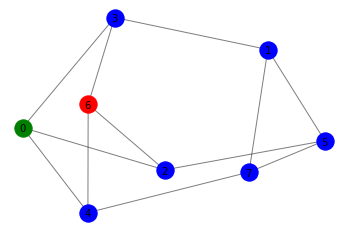

16 -1 False 1


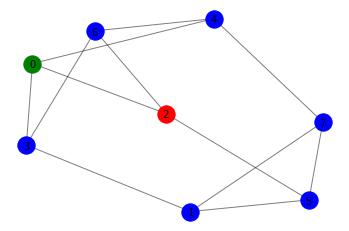

0 99 True 1
Destination Reached



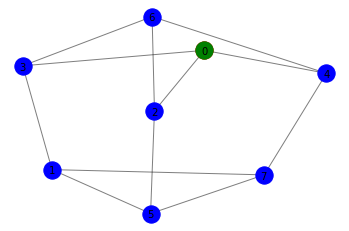

*********** Episode :  2 *********

Source =  5
Destination =  1
--------------------------------


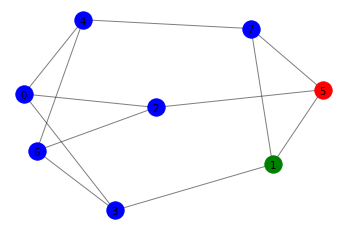

9 99 True 1
Destination Reached



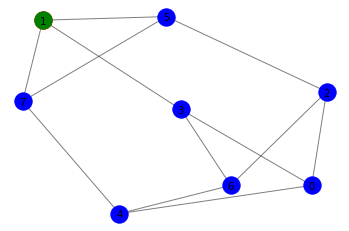

*********** Episode :  3 *********

Source =  6
Destination =  5
--------------------------------


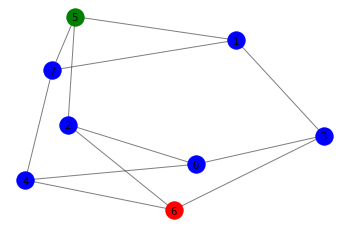

21 -1 False 1


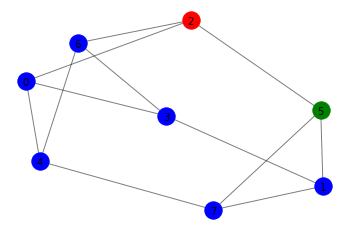

45 99 True 1
Destination Reached



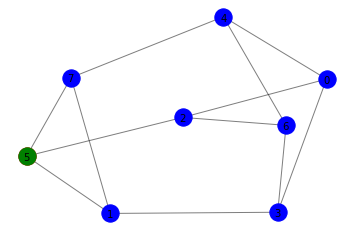

*********** Episode :  4 *********

Source =  1
Destination =  2
--------------------------------


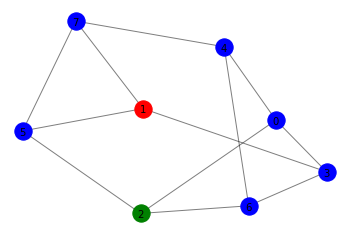

42 -1 False 1


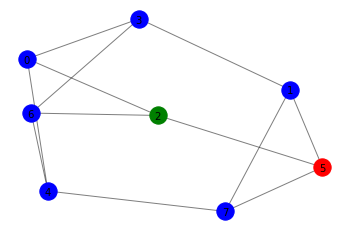

18 99 True 1
Destination Reached



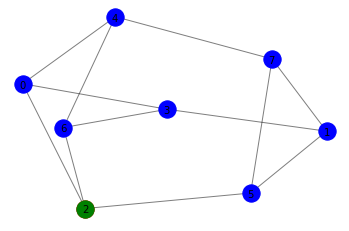

*********** Episode :  5 *********

Source =  0
Destination =  2
--------------------------------


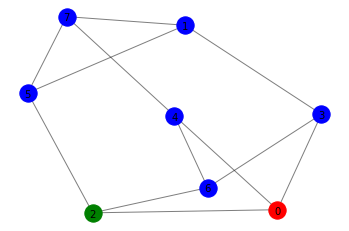

18 99 True 1
Destination Reached



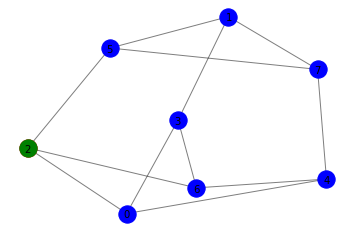

*********** Episode :  6 *********

Source =  0
Destination =  7
--------------------------------


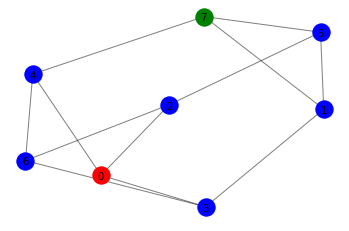

39 -1 False 1


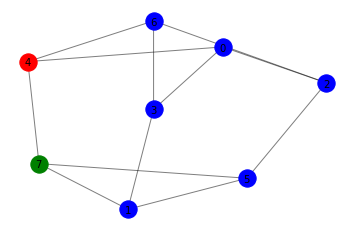

63 99 True 1
Destination Reached



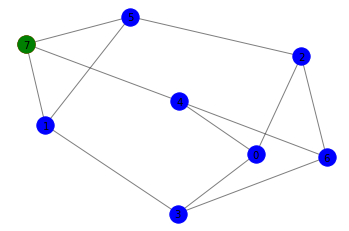

*********** Episode :  7 *********

Source =  4
Destination =  5
--------------------------------


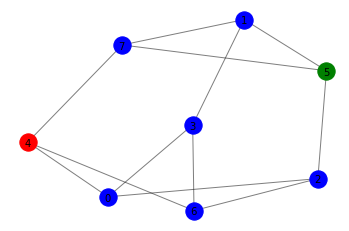

61 -1 False 1


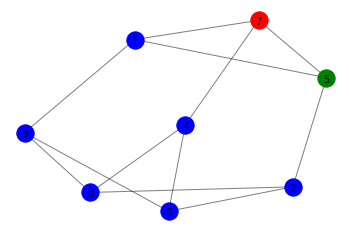

45 99 True 1
Destination Reached



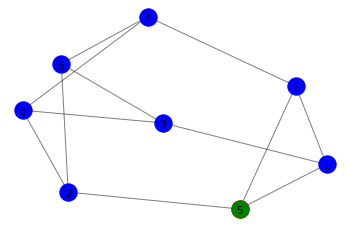

*********** Episode :  8 *********

Source =  6
Destination =  5
--------------------------------


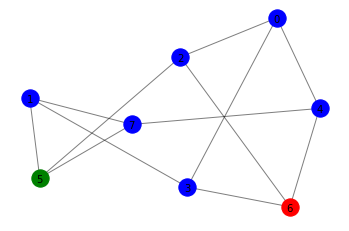

21 -1 False 1


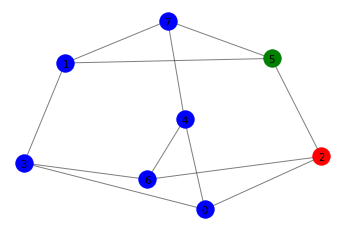

45 99 True 1
Destination Reached



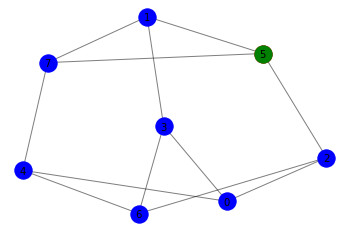

*********** Episode :  9 *********

Source =  6
Destination =  0
--------------------------------


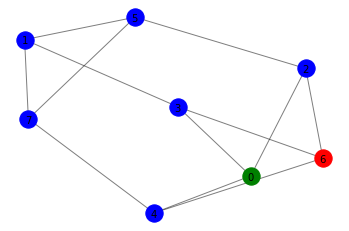

16 -1 False 1


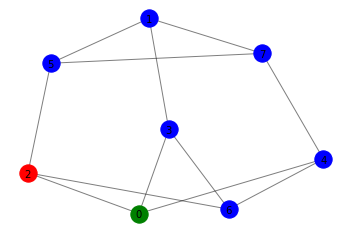

0 99 True 1
Destination Reached



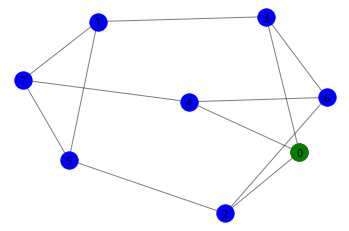

*********** Episode :  10 *********

Source =  3
Destination =  4
--------------------------------


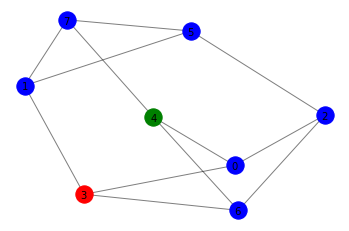

4 -1 False 1


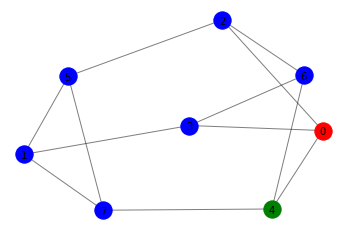

36 99 True 1
Destination Reached



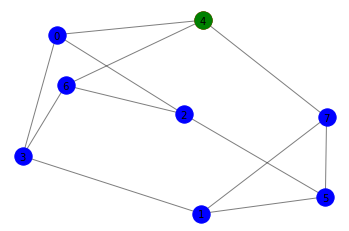

In [7]:
for episode in range(10):
    print("*********** Episode : ", episode+1,"*********\n")

    state = env.reset()
    done = False
    
    for step in range(max_steps_per_episode):
        env.render()
        
        action = np.argmax(q_table[state,:])
        new_state, reward , done, info = env.step(action)
        state = new_state
        if done:
            print("Destination Reached\n")
            env.render()
            break;
        
env.close()